## 1) Import Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv(r'C:\Users\APOORVA\Desktop\MACHINE LEARNING\Recording\19\train (1).csv')

## 2) Exploratory Data Analysis

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.isna().apply(pd.value_counts).T

,False,True
PassengerId,891.0,NaN
Survived,891.0,NaN
Pclass,891.0,NaN
Name,891.0,NaN
Sex,891.0,NaN
Age,714.0,177.0
SibSp,891.0,NaN
Parch,891.0,NaN
Ticket,891.0,NaN
Fare,891.0,NaN


<AxesSubplot:>

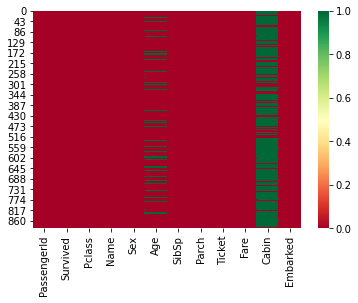

In [10]:
## We can also visualize missing data using seaborn

sns.heatmap(df.isnull(),cmap='RdYlGn')

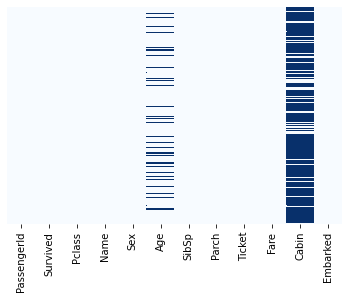

In [11]:
#deleting cbar and yticklabels and using different color
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='Blues')
plt.show()

######  Approximately 20% of Age data is missing and 77% of cabin data is missing.

#### Univariant Analysis

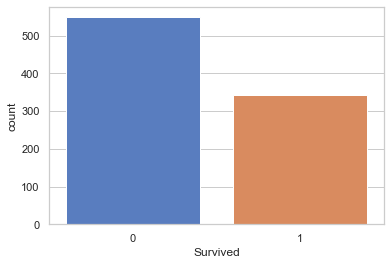

In [12]:
sns.set(style='whitegrid',palette='muted',color_codes=True)
sns.countplot(df.Survived)
plt.show()

##### Most of the people died in the Titanic Tragedy , only around 300 people survived.

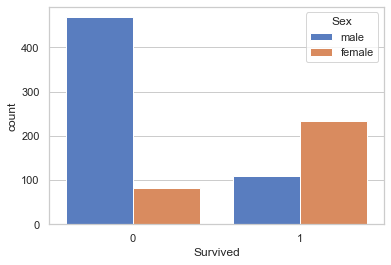

In [13]:
sns.countplot(df.Survived,hue=df.Sex)
plt.show()

##### There were more males than females aboard the ship, roughly double the amount. More males died in Titanic Tragedy than females 

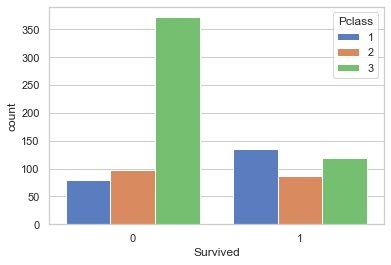

In [14]:
sns.countplot(df.Survived,hue=df.Pclass)
plt.show()

##### The majority of the people traveling, had tickets to the 3rd class.

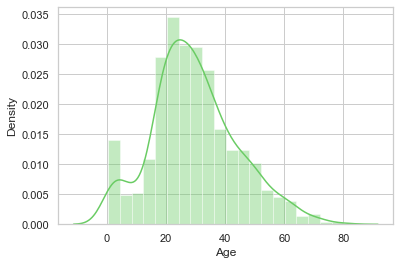

In [15]:
sns.distplot(df.Age,hist=True,kde=True,color='g')
plt.show()

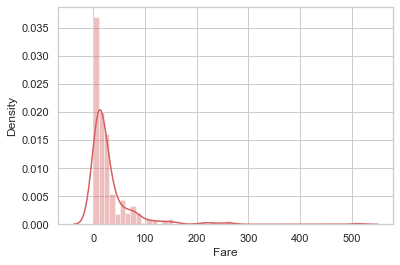

In [16]:
sns.distplot(df.Fare,hist=True,kde=True,color='r')
plt.show()

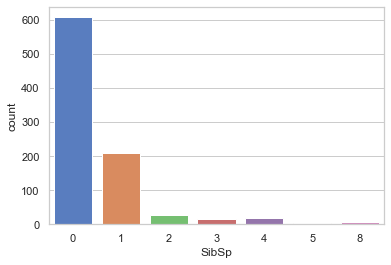

In [17]:
sns.countplot(df.SibSp)
plt.show()

## 3) Data Cleaning

##### We have to fill the missing data in Age Feature. Traditionally we fill calculating mean of all passengers ages (imputation) or We can check average age by passenger class

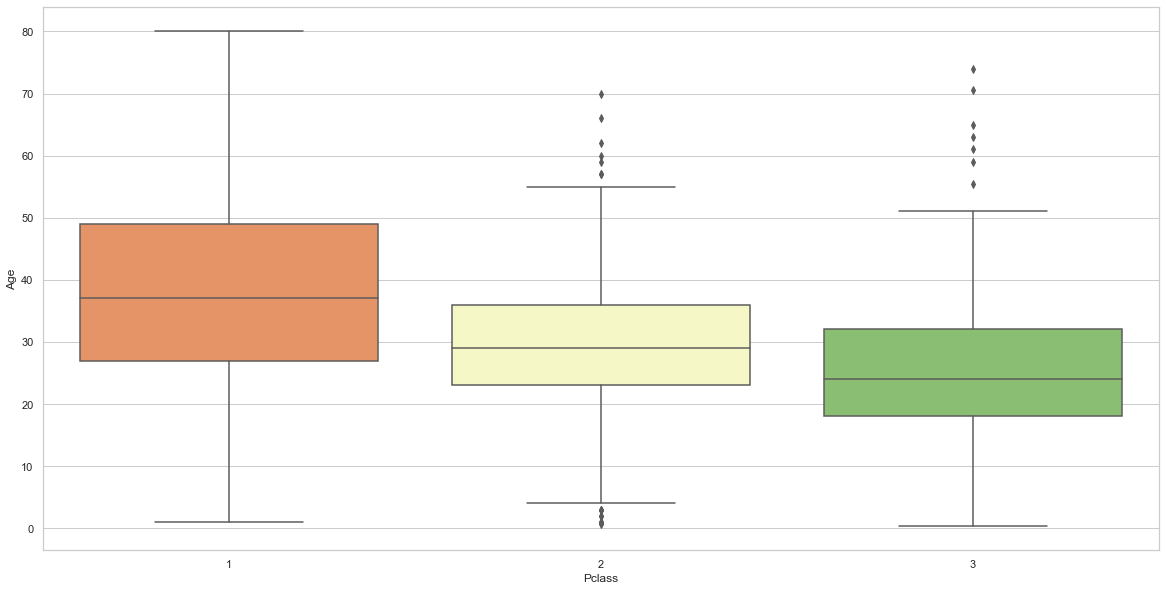

In [18]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Pclass',y='Age',data=df,palette='RdYlGn')
plt.show()

##### 1st class = age group is approximately 27 to 49 and 2nd class 23 to 36 and 3rd class 18 to 33

In [19]:
def filling_age(col):
    Age=col[0]
    Pclass=col[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
        
        elif Pclass ==2:
            return 29
        
        else:
            return 24
        
    else:
        return Age

In [20]:
# Can also use this traditional method
#df['Age'].fillna (df['Age'].mean(),inplace=True)

In [21]:
df['Age']=df[['Age','Pclass']].apply(filling_age,axis=1)

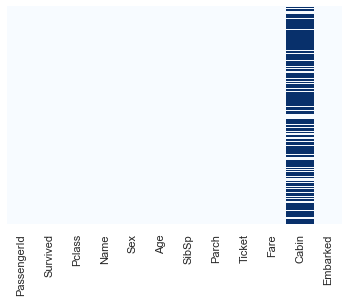

In [22]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='Blues')
plt.show()

## 4) Converting Cateogorical Features

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
le=LabelEncoder()

In [25]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [26]:
df['Sex']=le.fit_transform(df['Sex'])

In [27]:
df['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [28]:
df['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [29]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [30]:
df['Embarked']=le.fit_transform(df['Embarked'])

In [31]:
df['Embarked'].value_counts()

2    644
0    168
1     77
3      2
Name: Embarked, dtype: int64

In [32]:
df['Embarked'].fillna (df['Embarked'].mean(),inplace=True)

## 5) Building logistic Regression Model

### Train Test Split

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
corr=df.corr()
corr

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.035840,-0.057527,-0.001652,0.012658,0.013083
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.047255,-0.035322,0.081629,0.257307,-0.163517
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.408487,0.083081,0.018443,-0.549500,0.157112
Sex,0.042939,-0.543351,0.131900,1.000000,0.078421,-0.114631,-0.245489,-0.182333,0.104057
Age,0.035840,-0.047255,-0.408487,0.078421,1.000000,-0.243526,-0.171095,0.123784,-0.006734
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.243526,1.000000,0.414838,0.159651,0.066654
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.171095,0.414838,1.000000,0.216225,0.038322
Fare,0.012658,0.257307,-0.549500,-0.182333,0.123784,0.159651,0.216225,1.000000,-0.221226
Embarked,0.013083,-0.163517,0.157112,0.104057,-0.006734,0.066654,0.038322,-0.221226,1.000000


In [35]:
corr[['Survived']]

,Survived
PassengerId,-0.005007
Survived,1.000000
Pclass,-0.338481
Sex,-0.543351
Age,-0.047255
SibSp,-0.035322
Parch,0.081629
Fare,0.257307
Embarked,-0.163517


In [36]:
X=df.drop(['PassengerId','SibSp','Name','Parch','Fare','Ticket','Cabin','Survived'],axis=1)
X

,Pclass,Sex,Age,Embarked
0,3,1,22.0,2
1,1,0,38.0,0
2,3,0,26.0,2
3,1,0,35.0,2
4,3,1,35.0,2
...,...,...,...,...
886,2,1,27.0,2
887,1,0,19.0,2
888,3,0,24.0,2
889,1,1,26.0,0


In [37]:
y=df[['Survived']]
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [39]:
X_train.shape

(623, 4)

In [40]:
X_test.shape

(268, 4)

In [41]:
y_train.shape

(623, 1)

In [42]:
y_test.shape

(268, 1)

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
model=LogisticRegression()

In [45]:
# Training Logistic Regression model with training data
model.fit(X_train,y_train)

LogisticRegression()

#### Model Evaluation

In [46]:
y_pred=model.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0], dtype=int64)

In [47]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [48]:
accuracy_score(y_test,y_pred)

0.7723880597014925

In [49]:
model.score(X_train,y_train)

0.8105939004815409

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       153
           1       0.76      0.68      0.72       115

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



In [51]:
from sklearn.metrics import precision_score, recall_score
print("Precision:", precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))

Precision: 0.7647058823529411
Recall: 0.6782608695652174


In [55]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.7188940092165899

##### Our model predicts 76% of the time, a passengers survival correctly (precision). The recall tells us that it predicted the survival of 68% of the people who actually survived.

In [52]:
cf=confusion_matrix(y_test,y_pred)
cf

array([[129,  24],
       [ 37,  78]], dtype=int64)

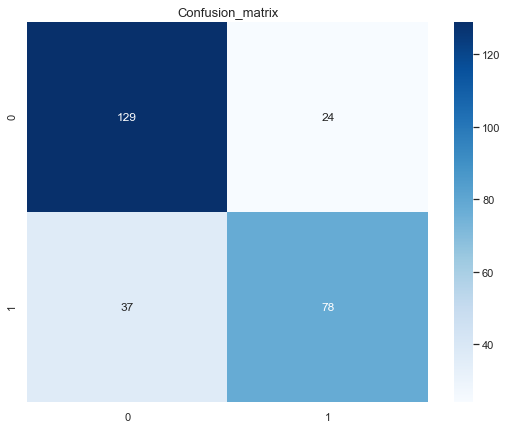

In [53]:
plt.figure(figsize=(9,7))
plt.title('Confusion_matrix',fontsize=13)
sns.heatmap(cf,cmap='Blues',annot=True,fmt='g')
plt.show()

##### The first row is about the not-survived-predictions: 129 passengers were correctly classified as not survived (called true negatives) and 24 where wrongly classified as not survived (false positives). The second row is about the survived-predictions: 37 passengers where wrongly classified as survived (false negatives) and 78 where correctly classified as survived (true positives).